# Identifying Age-Related Conditions Using Machine Learning Models
## Author: Boni M. Ale, MD, MSc, MPH
### Date: 08 June 2023

# 1. Introduction

To determine if someone has these medical conditions requires a long and intrusive process to collect information from patients. With predictive models, we can shorten this process and keep patient details private by collecting key characteristics relative to the conditions, then encoding these characteristics.

In this project, I will use Machine Learning to detect conditions with measurements of anonymous characteristics. Therefore the general objective of this analysis is to predict if a person has any of three medical conditions. In order to predict if the person has one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0), I will create a model trained on anonymous measurements of health characteristics.



**Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

**Load Datasets**

In [4]:
train_raw = pd.read_csv('/Users/boniale/Desktop/Data_Science/ML_iard/data/train.csv')
test = pd.read_csv('/Users/boniale/Desktop/Data_Science/ML_iard/data/test.csv')
greeks_raw = pd.read_csv('/Users/boniale/Desktop/Data_Science/ML_iard/data/greeks.csv')
sample_submission = pd.read_csv('/Users/boniale/Desktop/Data_Science/ML_iard/data/sample_submission.csv')

# 2. Exploratory Data Analysis

## 2.1. Data Description

In [5]:
print("Raw Train Data Set's size: ", train_raw.shape)

print("Raw Greeks Data Set's size: ", greeks_raw.shape)

#separate variables into new data frames
numeric_data = train_raw.select_dtypes(include=[np.number])
cat_data = train_raw.select_dtypes(exclude=[np.number])
cat_data = cat_data.drop(['Id'], axis=1)
print ("There are {} numeric and {} categorical columns in train raw data".format(numeric_data.shape[1],cat_data.shape[1]))

Raw Train Data Set's size:  (617, 58)
Raw Greeks Data Set's size:  (617, 6)
There are 56 numeric and 1 categorical columns in train raw data


These 56 numeric variables include our target which is "if the person has one or more of any of the three medical conditions (Class 1)" or "none of the three medical conditions (Class 0)". This means that Class is actually a categorical variable

## 2.2. Numerical Variables Exploration

In [6]:
numeric_data.head(5)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


These above 56 numeric variables include our target which is "if the person has one or more of any of the three medical conditions (Class 1)" or "none of the three medical conditions (Class 0)". This means that Class is actually a categorical variable. Therefore, we will remove our target from the set of numeric variable and look at the distrubition of all numerical variables. 

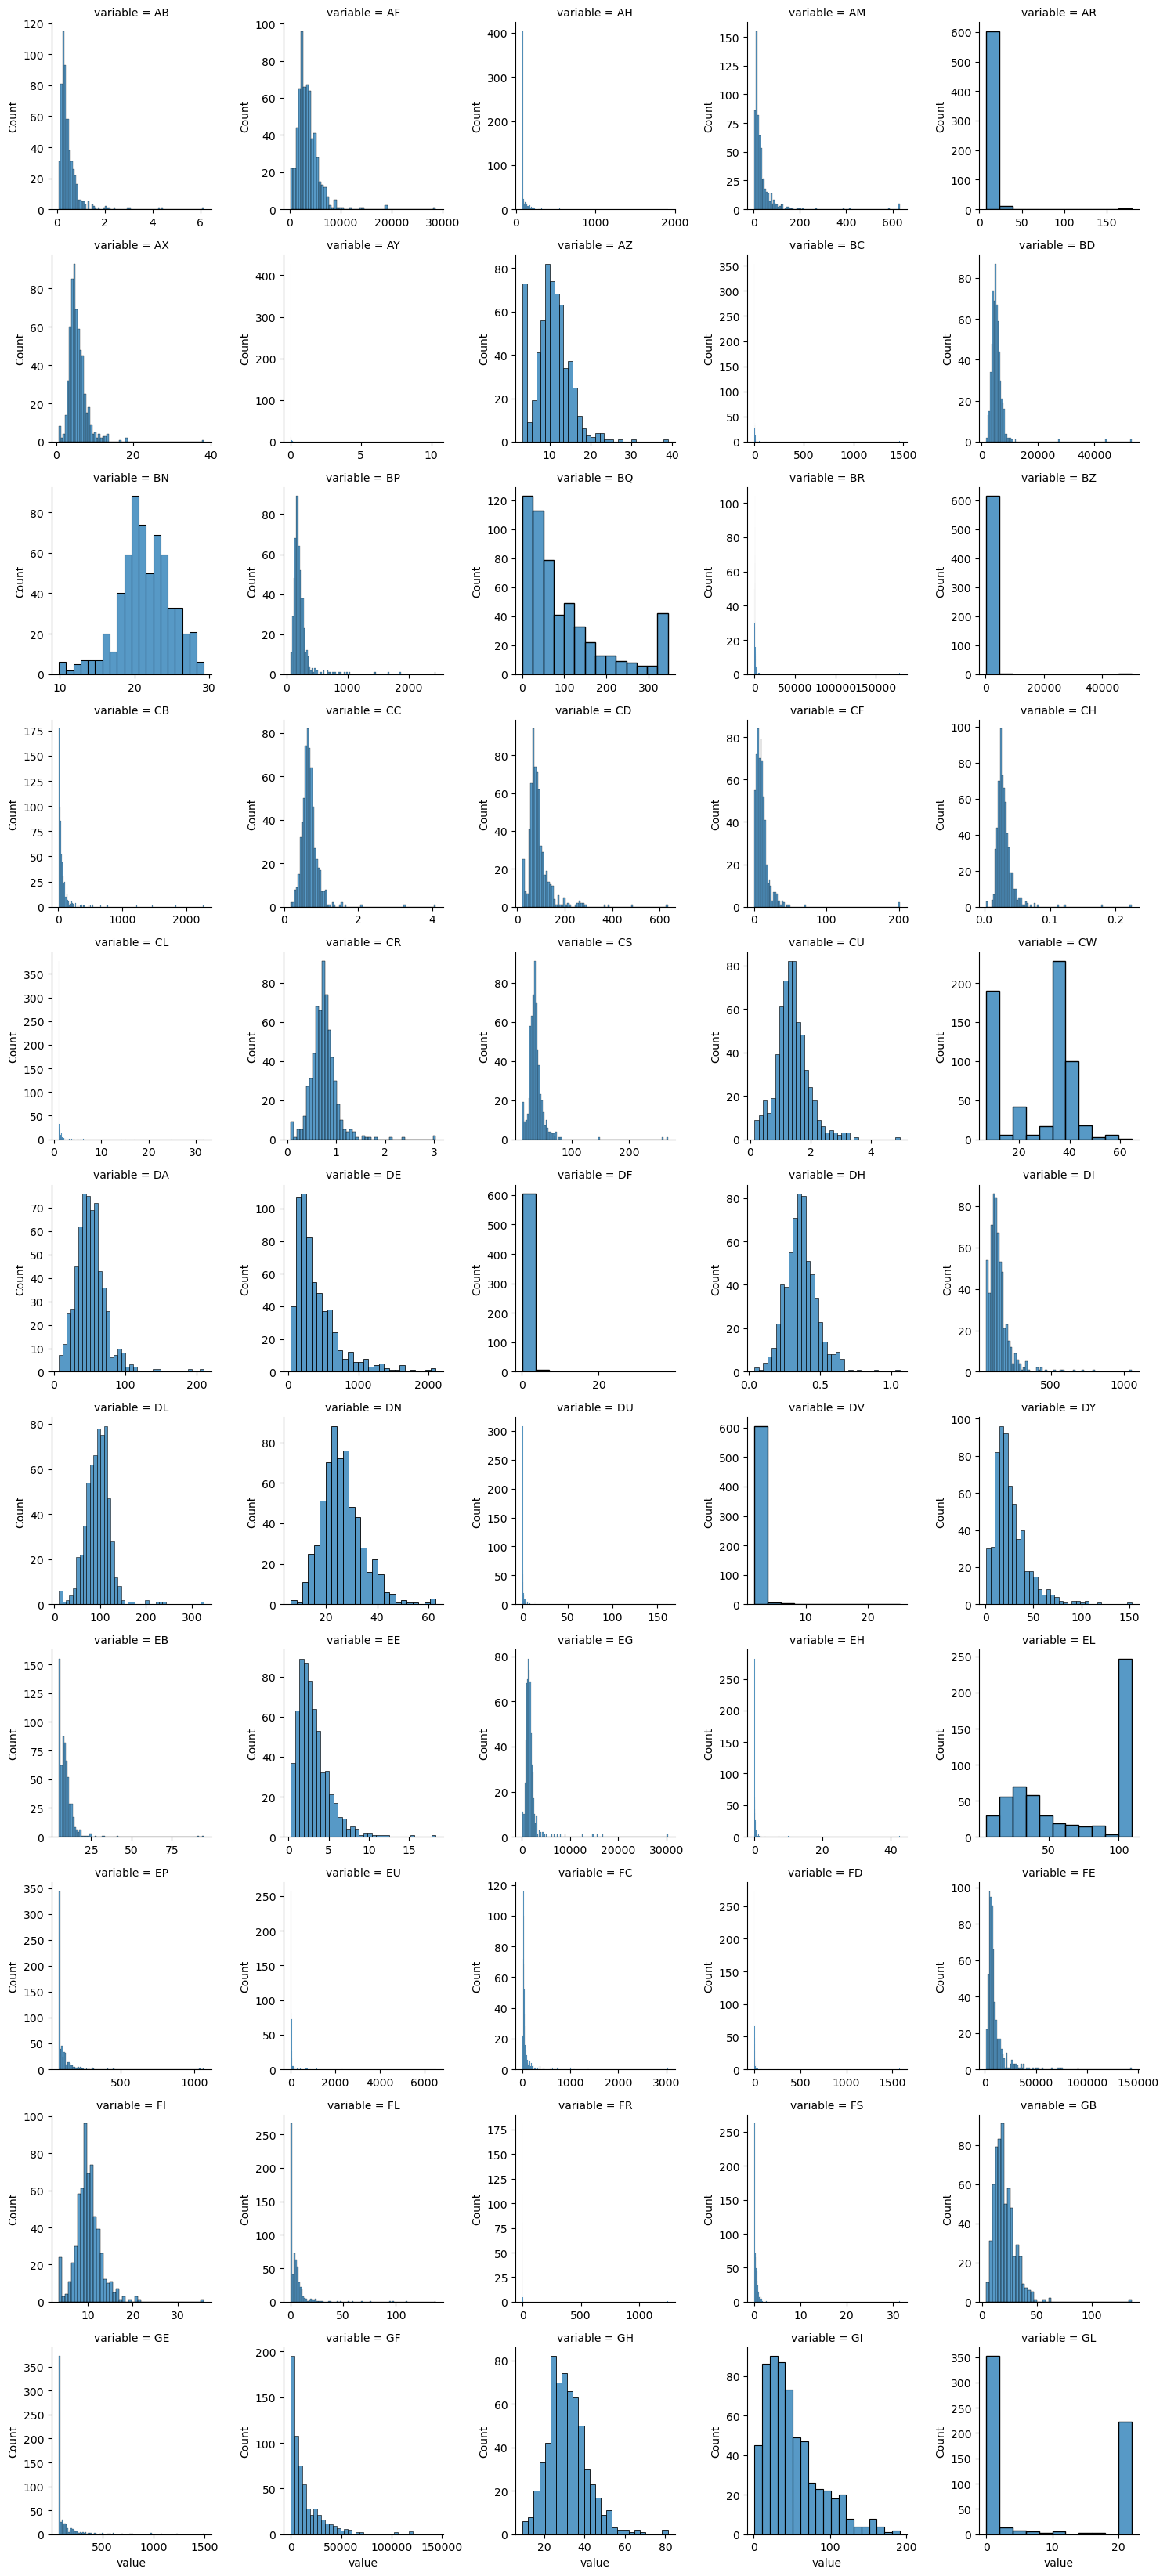

In [7]:
num = [f for f in train_raw.columns if train_raw.dtypes[f] != 'object']
num.remove("Class")
nd = pd.melt(train_raw, value_vars = num)
barplot_train = sns.FacetGrid (nd, col='variable',
                    col_wrap=5, 
                    sharex=False, 
                              sharey = False
                   )
barplot_train = barplot_train.map(sns.histplot, 'value')
plt.show("barplot_train")

We can see that several variables are not normally distributed. Let's focus on our target and see how it behave. 

## 2.3. Target Distribution

First, let's first calculate the frequence table for those who have the diseases and who does not have. Secondly, we will generate the percentages in each group. Finaly, I will do a visualisation to show the distribution of our target.

#### *Frequency Table of Class*

In [37]:
freq_tab = pd.crosstab(index = train_raw["Class"],  # Make a crosstab
                     columns="Total")                  # Name the count column
freq_tab

col_0,Total
Class,
0,509
1,108


#### *Percentage Table of Class*

In [20]:
my_tab = pd.crosstab(index = train_raw["Class"],  # Make a crosstab
                     columns="Percentage")                  # Name the count column

my_tab/my_tab.sum()*100 # Calculate the percentages 

col_0,Percentage
Class,
0,82.495948
1,17.504052


#### *Visualisation of Class*

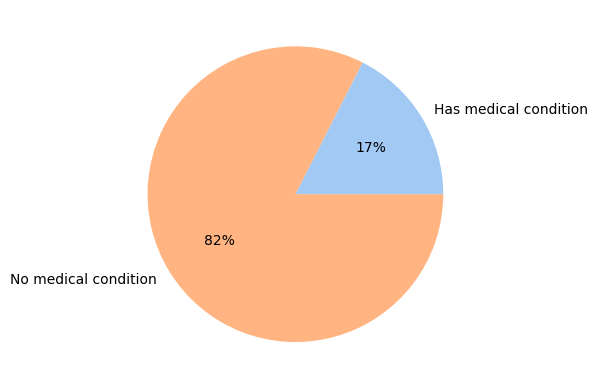

In [35]:
#define data
data_targ = [17.5 , 82.5]
labels = ['Has medical condition', 'No medical condition']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:50]

#create pie chart
plt.pie(data_targ, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()